In [1]:
# removing warning message
import warnings
warnings.filterwarnings("ignore")


Business Understanding:<br>
In a publishing house, employees have a portal where they share their creative content.
Many employees have posted poems on the portal. As there is a large collection of poems, the
company wants to categorize them into four genres, namely: affection, environment, music,
and death. Considering the volume of posts, the company wants to automate this task. We
want you to analyze the poems content and assign it accordingly. Develop and code a
solution using Python and machine learning. Please provide well-documented code, a model
if any, and clear instructions to run the code.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# importing the dataset
poem_df = pd.read_csv('Poem_classification - test_data.csv')

In [4]:
# Getting idea what the dataset is
poem_df

,Genre,Poem
0,Music,A woman walks by the bench I’m sitting onwith ...
1,Music,"Because I am a boy, the untouchability of beau..."
2,Music,"Because today we did not leave this world,We n..."
3,Music,"Big Bend has been here, been here. Shouldn’t i..."
4,Music,"I put shells there, along the lip of the road...."
...,...,...
145,Environment,"To pick a tulip from the garden, the red one. ..."
146,Environment,We are as clouds that veil the midnight moon; ...
147,Environment,"When pulled, the spider web took another form...."
148,Environment,Whose woods these are I think I know. His hous...


In [5]:
# checking the number of duplicated rows
poem_df.duplicated().sum()

0

In [6]:
# checking non null values and data types
poem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   150 non-null    object
 1   Poem    150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [7]:
# Checking if dataset is balanced or not
poem_df['Genre'].value_counts()

Genre
Affection      100
Environment     25
Death           13
Music           12
Name: count, dtype: int64

We have 4 categories.<br> And we have a imbalanced dataset.

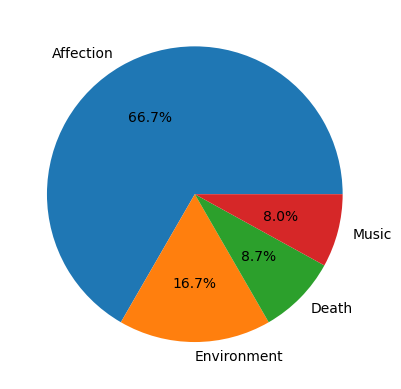

In [8]:
# Visualizing it
import matplotlib.pyplot as plt
import seaborn as sns
temp_ = poem_df['Genre'].value_counts().reset_index()
plt.pie(x=temp_['count'],labels=temp_['Genre'],autopct='%1.1f%%')
plt.show()

We will handle the imbalanced dataset later.<br>
For now lets preprocess the text data i.e Poem column.

In [9]:
# splitting independent and dependent variables
X = poem_df["Poem"]
y = poem_df["Genre"]

In [10]:
# Import libraries for text preprocessing
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

def preprocess_text(text):
  
    text = text.lower()                                                             # Lowercase text
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])     # Remove punctuation and numbers
    stop_words = set(stopwords.words('english'))                                    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words]) 
    text = ' '.join([lem.lemmatize(word) for word in text.split()])                 # Lemmatize words 
    text = text.strip()                                                             # removes leading and trailing whitespaces

    return text

[nltk_data] Downloading package stopwords to /home/kamal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kamal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# applying preprocessing to the text data
X = X.apply(preprocess_text)

In [12]:
# # Since we have categorical target data, we need to convert it to numerical 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [14]:
# Converting X_train and X_test into vector form
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [15]:
# Since we have imbalanced dataset, we need to balance the classes
# Here we are using oversampling method like SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [16]:
from imblearn.under_sampling import RandomUnderSampler


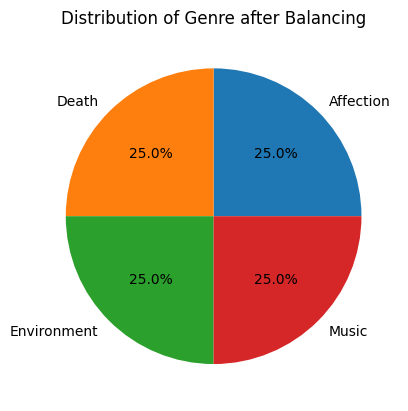

In [17]:
# plotting Graph after oversampling
temp_ = np.unique(y_train,return_counts=True)

plt.pie(x=temp_[1],labels=le.inverse_transform(temp_[0]),autopct='%1.1f%%')
plt.title("Distribution of Genre after Balancing")
plt.show()

### Model Building

In [18]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def validating_model(model, X_test, y_test):
    y_pred = model.predict(X_test)                                      # Predicting the output
    Accuracy = accuracy_score(y_test, y_pred)                           # Accuracy Score
    Precision = precision_score(y_test, y_pred, average="macro")        # Precision Score
    Recall = recall_score(y_test, y_pred, average="macro")              # Recall Score
    F1_score = f1_score(y_test, y_pred, average="macro")                # F1 Score

    return Accuracy, Precision, Recall, F1_score

In [19]:
# Creating a dataframe to store model's performance

model_performance = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1_score"])

In [20]:
# importing library for ml model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [21]:

# Finding best model
def find_best_algo(X_train, X_test, y_train, y_test):
    
    # initiating a dictionary
    models = {}
    
    # Storing model_names and model
    models['Logistic Regression']=LogisticRegression()                      # Logistic Regression
    models['KNN']=KNeighborsClassifier()                                    # KNN Classifier
    models['SVC']=SVC()                                                     # Support Vector Classifier
    models['Naive Bayes']=MultinomialNB()                                   # Naive Bayes Classifier
    models['Decision Tree']=DecisionTreeClassifier()                        # Decision Tree Classifier
    models['RandomForest']=RandomForestClassifier()                         # Random Forest Classifier
    models['Gradient Boosting']=GradientBoostingClassifier()                # Gradient Boosting Classifier
    models['XGBoost']=XGBClassifier()                                       # XGBoost Classifier
    
    
    # DataFrame to store model results

    model_performance = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1_score"])
    
    # Now iterating over each model
    for model_name, model in models.items():
        # print(model_name)
        try:
            model.set_params(random_state=42)         # Blocking randomness
        except:                                        # Some of them are not supported
            pass
        
        model.fit(X_train, y_train)                   # Fitting the model
        
        # Storing y_test prediced values
        y_pred = model.predict(X_test)
        
        # storing scores
        model_performance.loc[model_name] = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred,average='weighted'), recall_score(y_test, y_pred,average='weighted'), f1_score(y_test, y_pred,average='weighted')
        
    return model_performance 

In [22]:
# getting model performance
find_best_algo(X_train, X_test, y_train, y_test)

,Accuracy,Precision,Recall,F1_score
Logistic Regression,0.710526,0.638691,0.710526,0.609858
KNN,0.105263,0.031328,0.105263,0.046617
SVC,0.684211,0.468144,0.684211,0.555921
Naive Bayes,0.315789,0.589234,0.315789,0.362298
Decision Tree,0.500000,0.504737,0.500000,0.500000
RandomForest,0.684211,0.468144,0.684211,0.555921
Gradient Boosting,0.605263,0.476874,0.605263,0.533452
XGBoost,0.631579,0.469173,0.631579,0.538395


Above data shows 'logistic regression', 'SVC' and 'Random Forest' are performed well on the same dataset.

### Hyperparameter tuning

In [23]:
# Initiating the model
lr = LogisticRegression(max_iter=100000, random_state=42)

In [24]:
# Will use GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV
# All parameters for logistic regression
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [25]:
# Creating GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, verbose=0, n_jobs=-1, scoring='accuracy')


In [26]:
# Fit the grid search to the data
grid_search_lr.fit(X_train, y_train)

/home/kamal/Desktop/Projects/poem genre classification/poem_env/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=100000, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [27]:
# These are the best parameters 
grid_search_lr.best_params_

{'C': 78.47599703514607, 'penalty': 'l2', 'solver': 'sag'}

In [28]:
# And the best Accuracy score is
grid_search_lr.best_score_

0.9966666666666667

In [29]:
# Finding testing accuracy score

y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.7105263157894737

<Axes: >

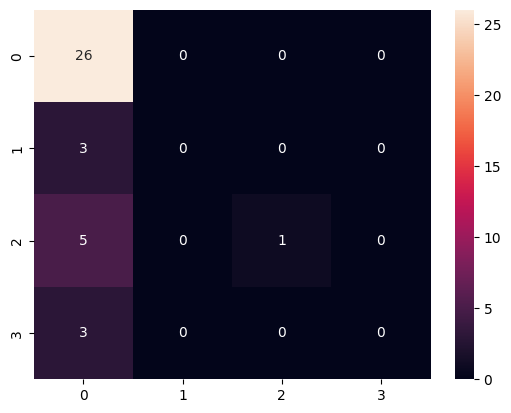

In [30]:
from sklearn.metrics import confusion_matrix

# Visualizing confussion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr),annot=True,)

In [31]:
#Computing ROC-AUC score
from sklearn.metrics import roc_auc_score

# Use the model to make predictions on the test data
y_pred_lr = grid_search_lr.predict_proba(X_test)

# Compute the ROC-AUC score for each class
roc_auc_scores = roc_auc_score(y_test, y_pred_lr, multi_class='ovr')

print("ROC-AUC Scores:", roc_auc_scores)


ROC-AUC Scores: 0.5833733974358974


In [32]:
le.inverse_transform([0])

array(['Affection'], dtype=object)

In [33]:
# Replace "new_poem" with your actual new poem text
new_poem = ['put shell along lip roadbivalv last summer dinner dog eatsa char rock begun practic eat']
new_features = tfidf.transform(new_poem)
predicted_genre = grid_search_lr.predict(new_features)[0]

print("Predicted genre:", predicted_genre)


Predicted genre: 3


In [34]:
def for_checking_model(poem,model):
    poem = preprocess_text(poem)
    poem_features = tfidf.transform([poem])
    predicted_genre = model.predict(poem_features)
    
    return le.inverse_transform(predicted_genre)[0]

In [35]:
poem = '''With every gesture, every glance,
Affection weaves its sweet romance.
In whispered secrets, in silent grace,
It fills our lives with boundless grace.'''

In [36]:
for_checking_model(poem,grid_search_lr)

'Affection'

In [37]:
poem = '''Love's gentle touch, a soothing balm,
In its embrace, we find our calm.
With tender words and warm caress,
We navigate life's wilderness.'''
print(for_checking_model(poem,grid_search_lr))
print(for_checking_model(poem,grid_search_svm))
print(for_checking_model(poem,grid_search_rfc))

Affection


NameError: name 'grid_search_svm' is not defined

In [ ]:
poem = '''Let's tread with care upon her soil,
Protect her wonders, ceaseless toil.
For in her beauty, we find our worth,
A fragile gem in the vast universe.'''
print(for_checking_model(poem,grid_search_lr))
print(for_checking_model(poem,grid_search_svm))
print(for_checking_model(poem,grid_search_rfc))

Affection
Affection
Affection


In [ ]:
poem_df

,Genre,Poem
0,Music,A woman walks by the bench I’m sitting onwith ...
1,Music,"Because I am a boy, the untouchability of beau..."
2,Music,"Because today we did not leave this world,We n..."
3,Music,"Big Bend has been here, been here. Shouldn’t i..."
4,Music,"I put shells there, along the lip of the road...."
...,...,...
145,Environment,"To pick a tulip from the garden, the red one. ..."
146,Environment,We are as clouds that veil the midnight moon; ...
147,Environment,"When pulled, the spider web took another form...."
148,Environment,Whose woods these are I think I know. His hous...


In [ ]:
# Initiating the Support Vector classifier model
svm = SVC(random_state=42)

In [ ]:
# Making parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5]
    }

In [ ]:
# Making GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=False)

In [ ]:
# Fitting the grid search to the test data
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=False)

In [ ]:
# best parameters for svc 
grid_search_svm.best_params_

{'C': 10, 'degree': 2, 'kernel': 'linear'}

In [ ]:
# And the best Accuracy score is
grid_search_svm.best_score_

0.9966666666666667

In [ ]:
# # Finding testing accuracy score

y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.6842105263157895

<Axes: >

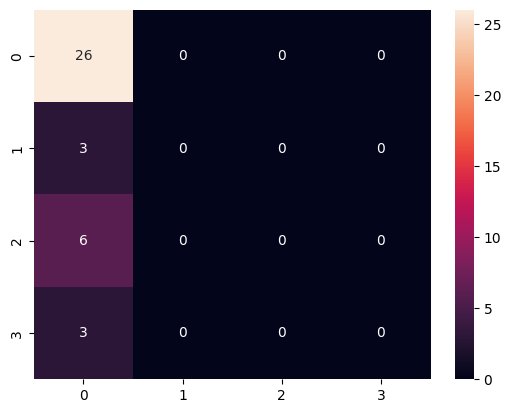

In [ ]:
# Visualizing confussion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm),annot=True,)

In [ ]:
# Create the RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, oob_score=True)

In [ ]:
# Define the parameter grid

param_grid_rfc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.1, 0.5, 1.0]  # Regularization parameter for Random Forest
    
}

In [ ]:
# Making GridSearchCV
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [ ]:
# # Fit the GridSearchCV object to the training data
grid_search_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.1, 0.5, 1.0],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# Print the best hyperparameters found
print("Best hyperparameters:", grid_search_rfc.best_params_)

Best hyperparameters: {'ccp_alpha': 0.0, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Finding testing accuracy score

y_pred_rfc = grid_search_rfc.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred_rfc)

0.6842105263157895

<Axes: >

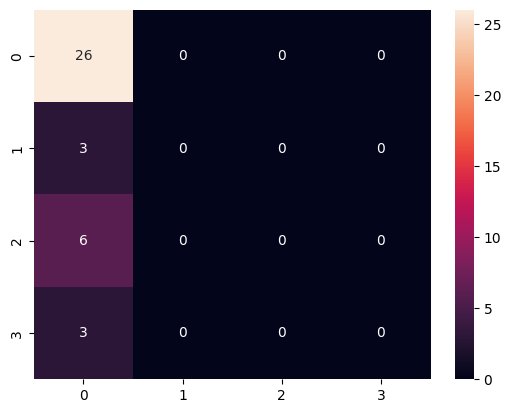

In [ ]:
# Visualizing confussion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm),annot=True)

As i have build multiple models where i got Logistic Regression, SVM and Random Forest having better accuracy score.
Then after hyperparameter tuning i got Logistic Regression is perfotming well with better accuracy score on the same dataset.

But,models are not performing well on the same dataset. beacuse of very less data and unbalance data after balancing they are
becoming overfitting.

For which i didn't satusfied with these models, i decided to add more more data to label and for increasing model accuracy.

Which i have build in the other file.


******************************************************************************************************************************************************************************************************************************************************